In [ ]:
# Install required libraries
!pip install roboflow
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.8/823.8 kB 18.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)

In [ ]:
# Import required library
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 30.1/201.2 GB disk)


In [ ]:
# Insert API KEY Roboflow for download dataset
from getpass import getpass
ROBOFLOW_API_KEY = getpass('Enter ROBOFLOW_API_KEY secret value: ')

Enter ROBOFLOW_API_KEY secret value: ··········


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Download dataset on Roboflow
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("annisa-lianda-zk0uu").project("agplant-vision")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.63, to fix: `pip install ultralytics==8.0.196`
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to agplant-vision-1 in yolov8:: 100%|██████████| 12005/12005 [00:02<00:00, 5595.57it/s]


In [ ]:
# Path data training
training_dir = os.path.join('/content/datasets/agplant-vision-1/train/images')

# Path data validation
validation_dir = os.path.join('/content/datasets/agplant-vision-1/valid/images')

In [ ]:
# Amount of data training and validation
print('total data training :', len(os.listdir(training_dir)))
print('total data validation :', len(os.listdir(validation_dir)))

total data training : 5784
total data validation : 214


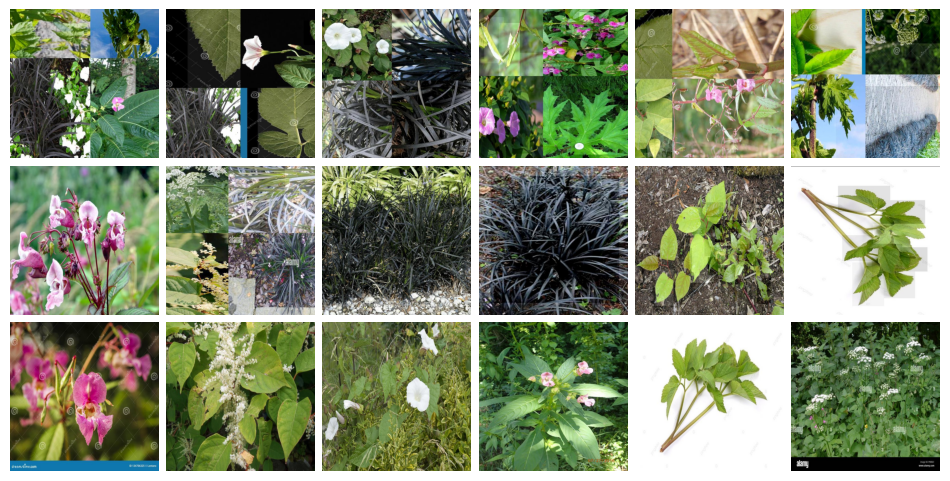

In [ ]:
# Display sample image of each class
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

training_names_file = os.listdir(training_dir)
validation_names_files = os.listdir(validation_dir)

nrows = 3
ncols = 6

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)

pic_index += 18
next_training_pic = [os.path.join(training_dir, fname)
                for fname in training_names_file[pic_index-18:pic_index-9]]
next_validation_pic = [os.path.join(validation_dir, fname)
                for fname in validation_names_files[pic_index-9:pic_index]]

for i, img_path in enumerate(next_training_pic + next_validation_pic):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.subplots_adjust(wspace=0.05, hspace=0.05)

plt.show()

In [ ]:
dataset.location

'/content/datasets/agplant-vision-1'

In [ ]:
# Setup Dataset Location
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
!rm -rf datasets/

In [ ]:
!rm -rf /content/runs/detect/

In [ ]:
# Training Model
%cd {HOME}

!yolo task=detect mode=train epochs=100 batch=32 imgsz=600 plots=True \
model=yolov8m.pt \
data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/agplant-vision-1/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

In [ ]:
# Display result of training
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1721749852.3a393a7e21b1.8406.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch16290.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch16291.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch16292.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


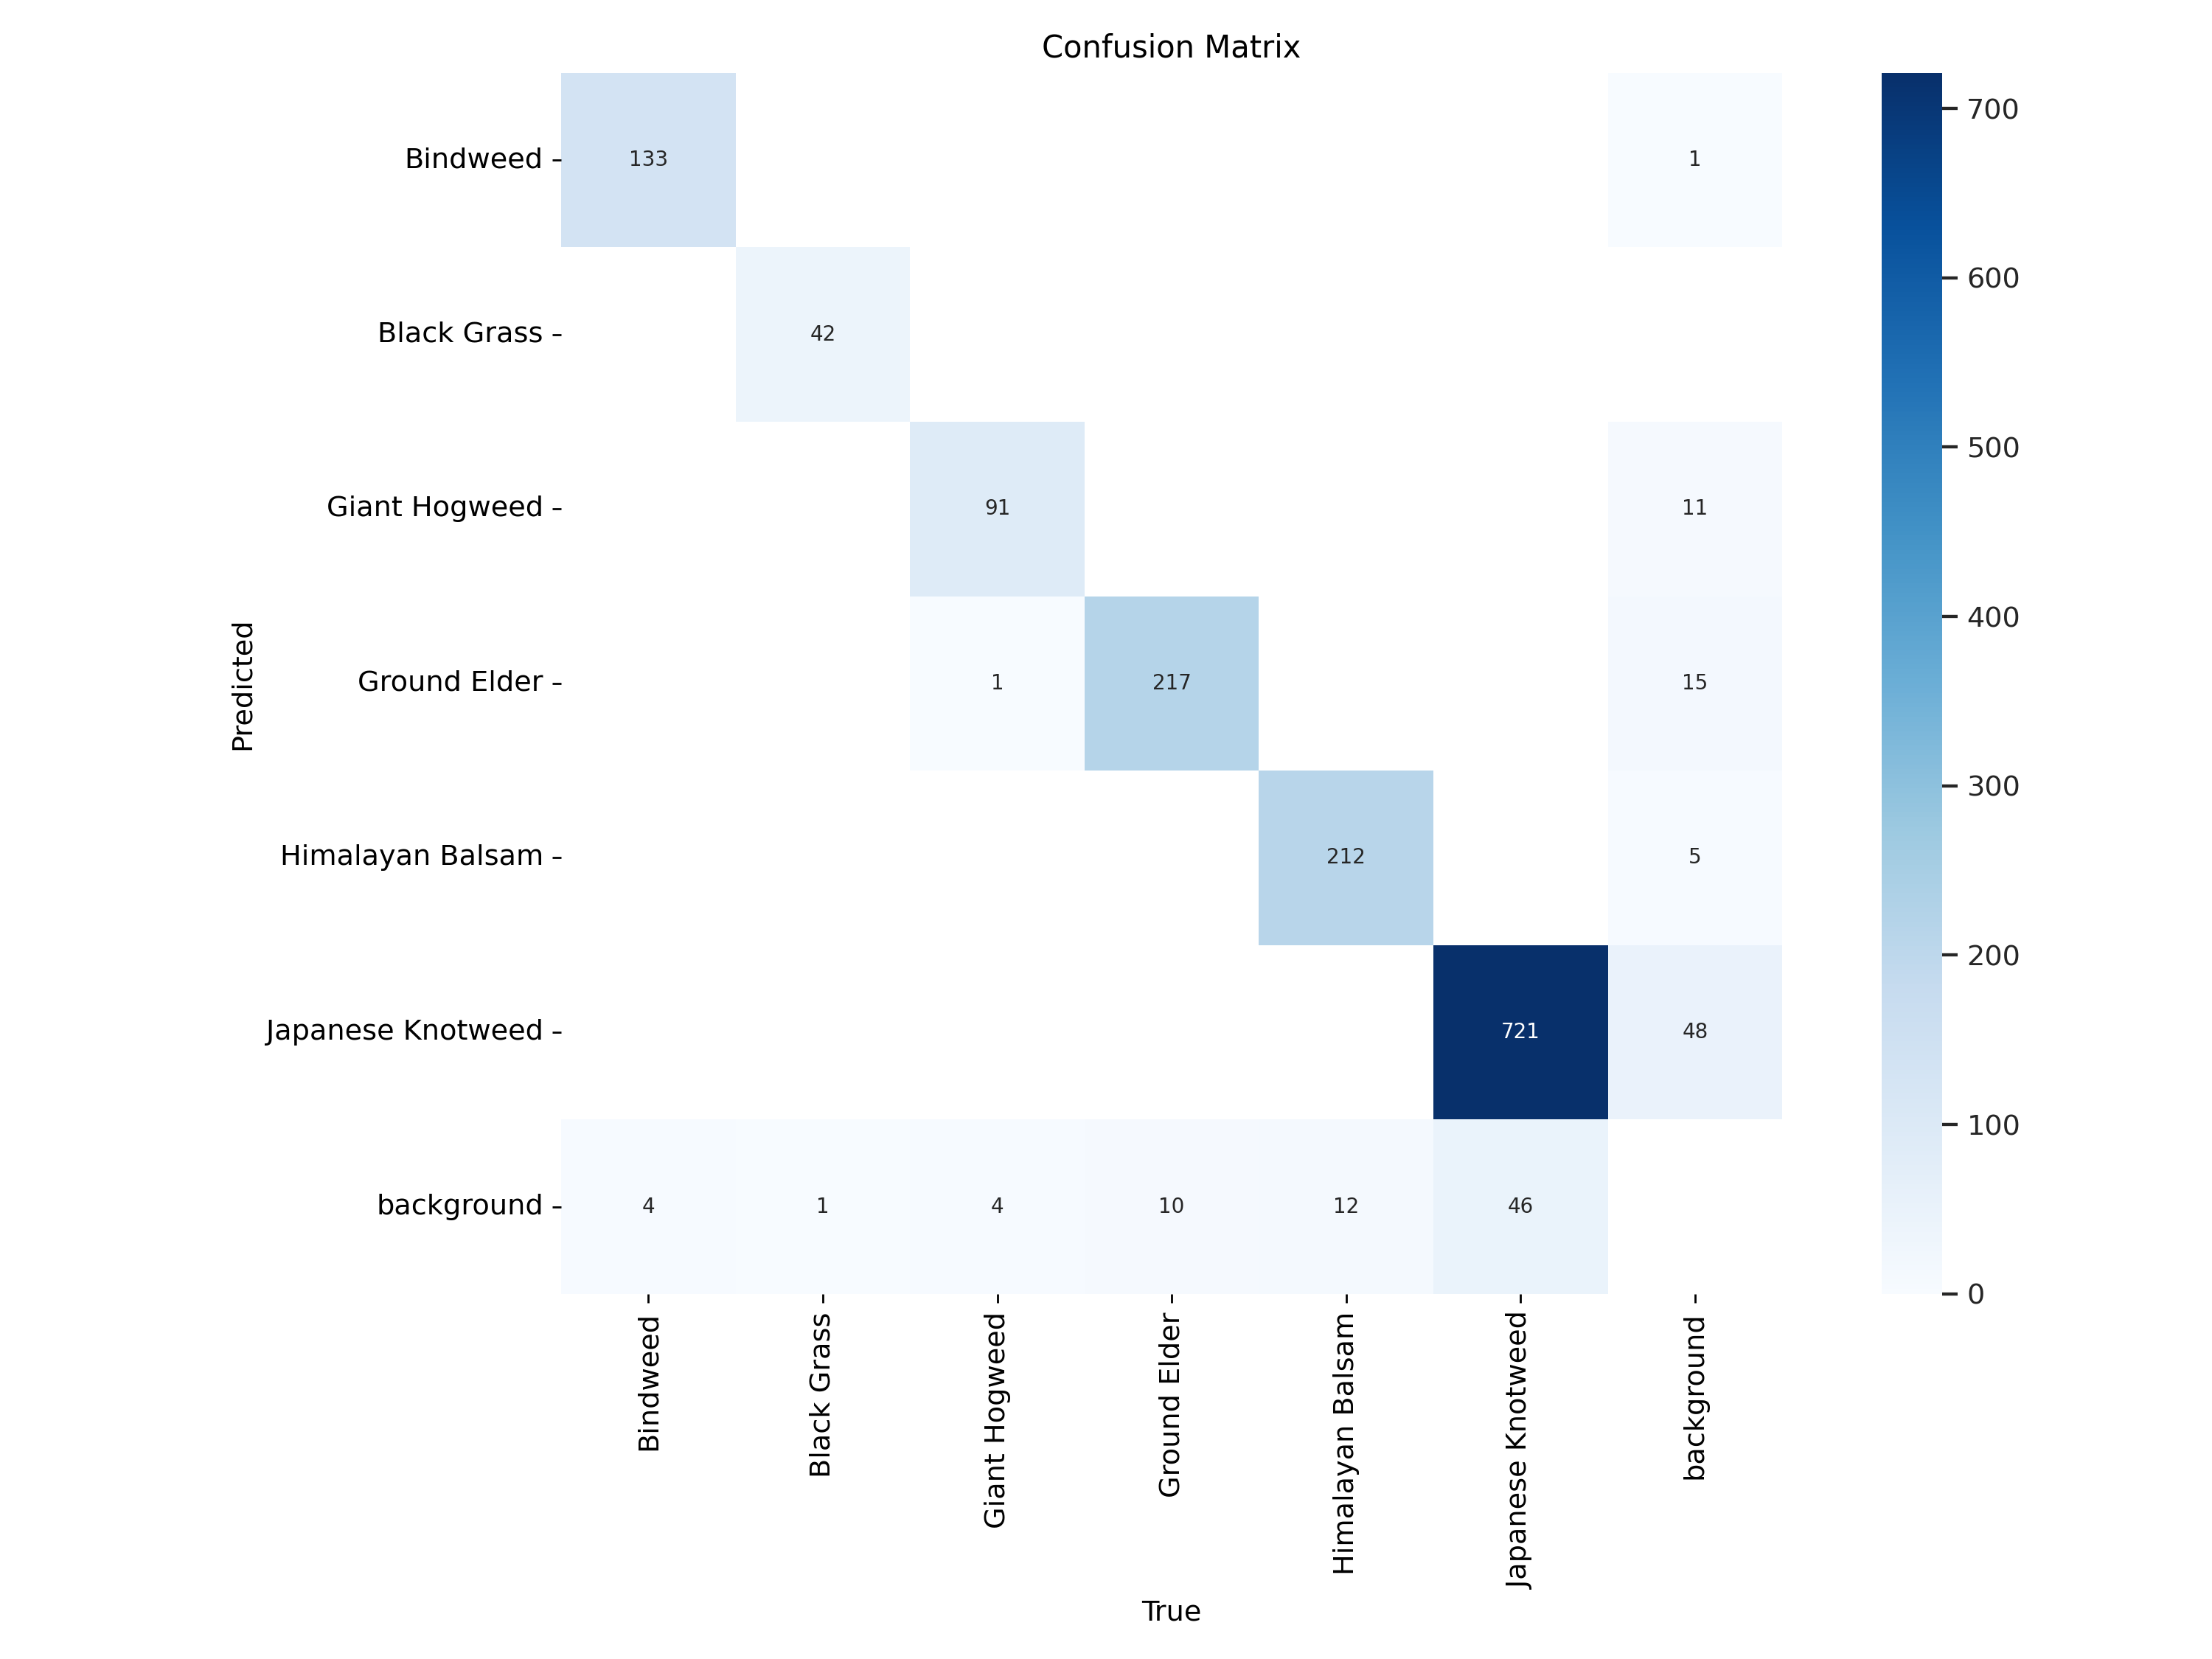

In [ ]:
# Display result of Confusion Matrix
%cd {HOME}
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

/content


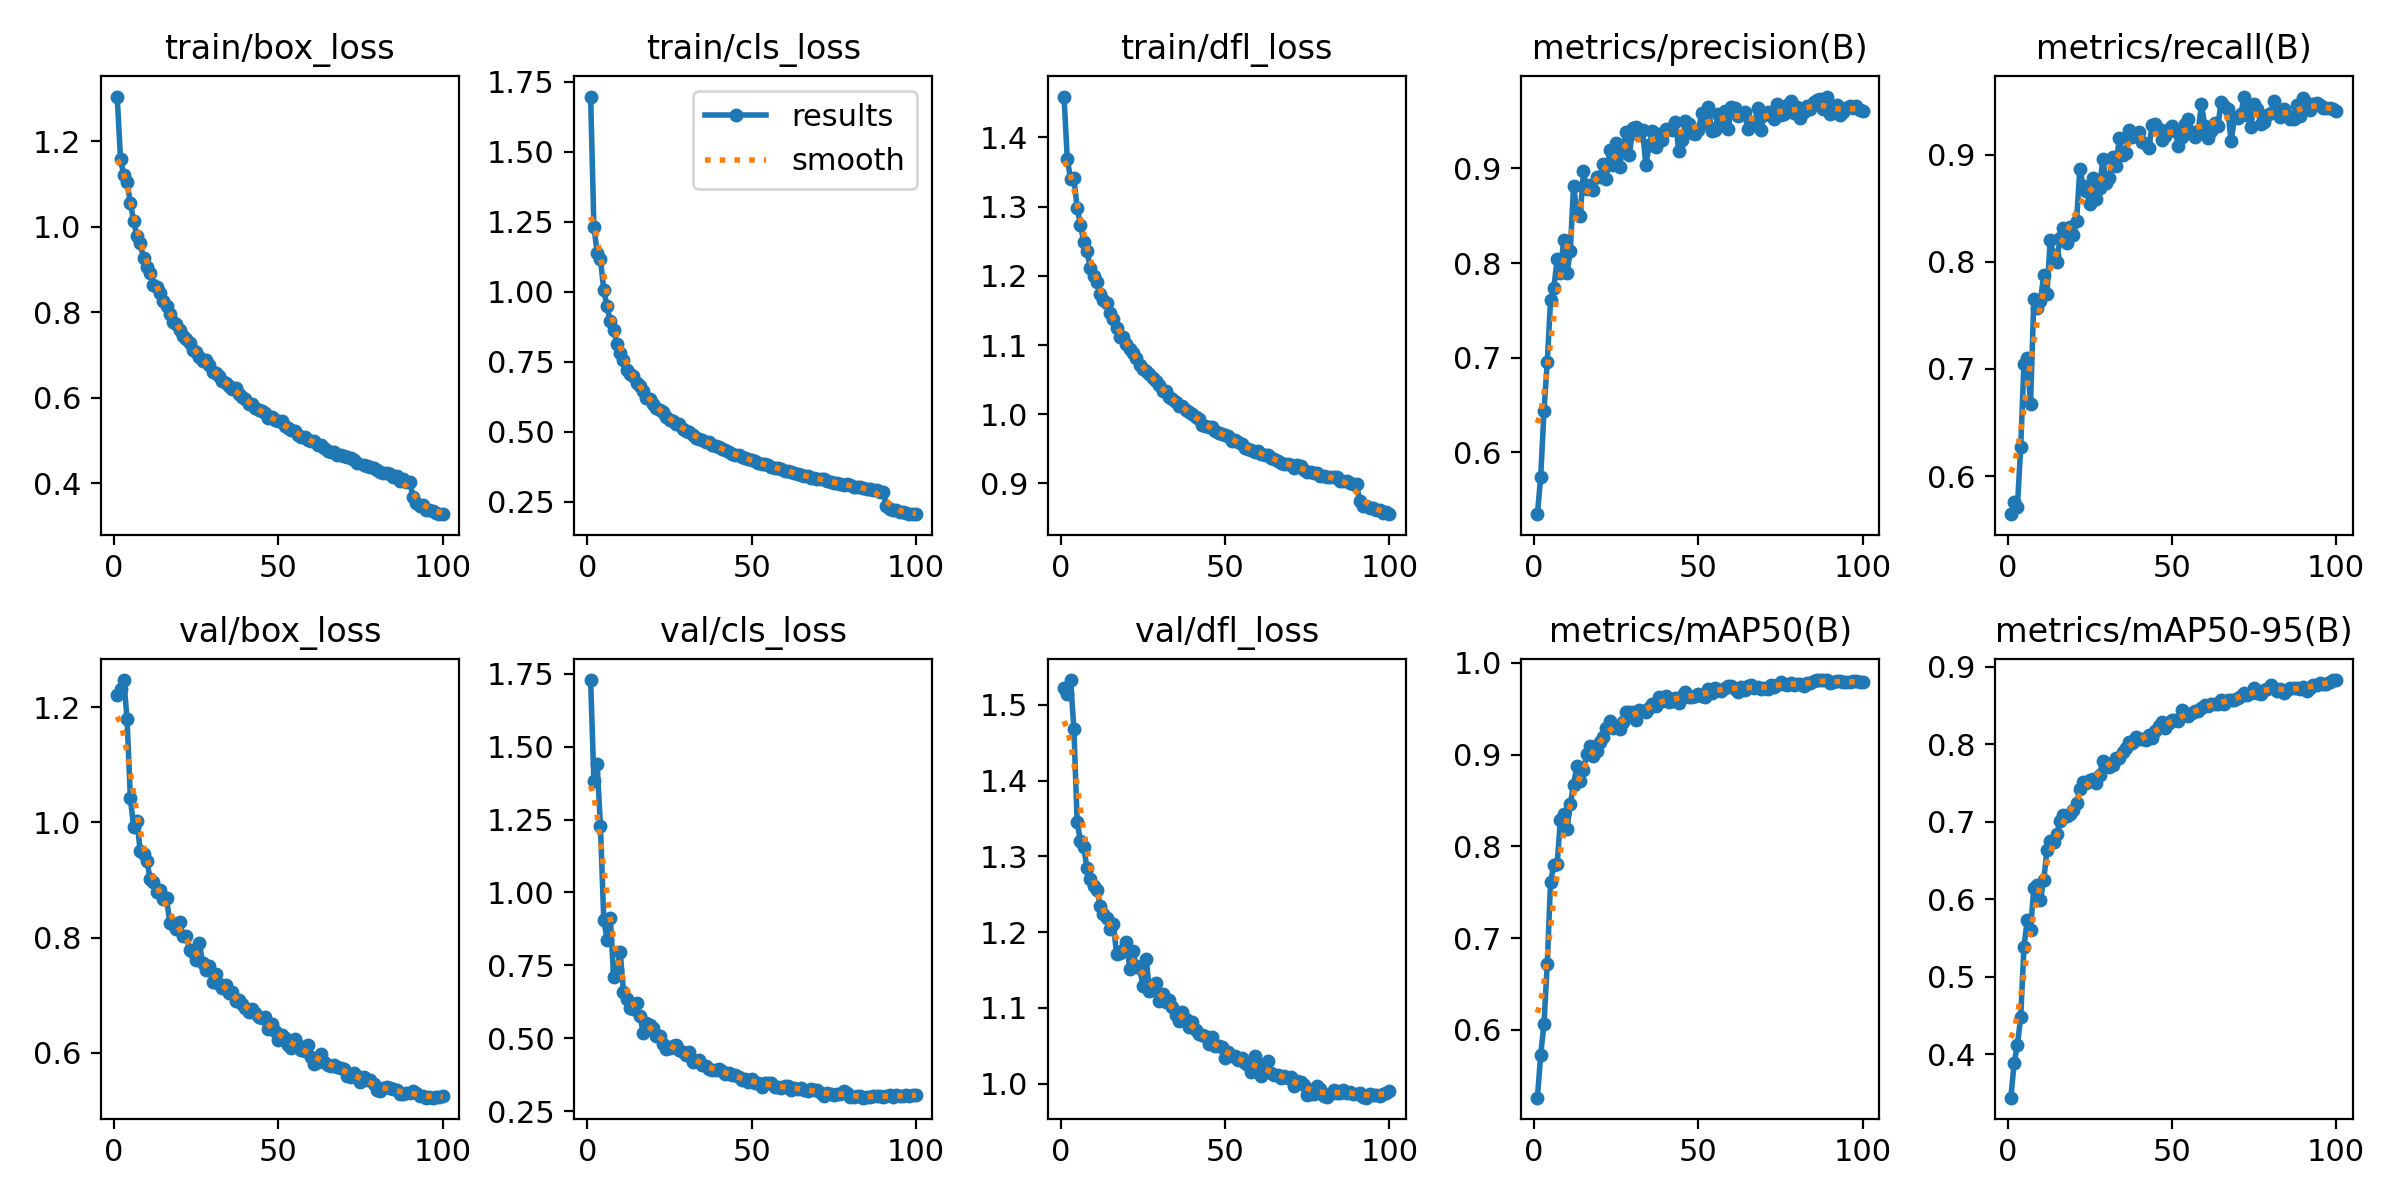

In [ ]:
# Display metric result of Training and Validation
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [ ]:
# Run inference on an image with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='black grass.jpg'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/black grass.jpg: 448x608 2 Black Grasss, 241.4ms
Speed: 2.3ms preprocess, 241.4ms inference, 14.0ms postprocess per image at shape (1, 3, 448, 608)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


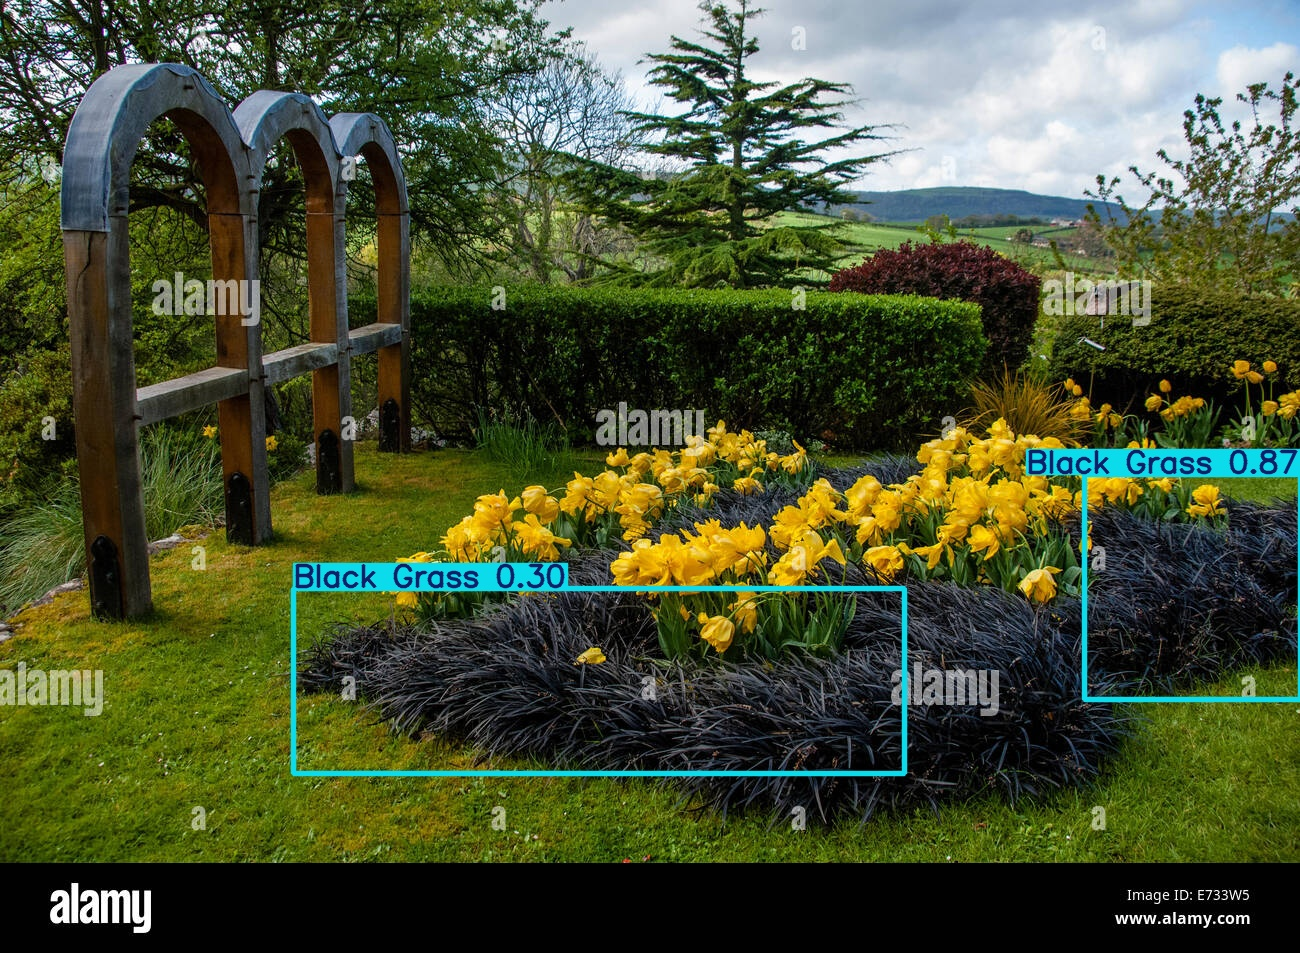

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
# Run inference on an image with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='himalayan balsam.jpg'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/himalayan balsam.jpg: 416x608 5 Himalayan Balsams, 205.1ms
Speed: 2.3ms preprocess, 205.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 608)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


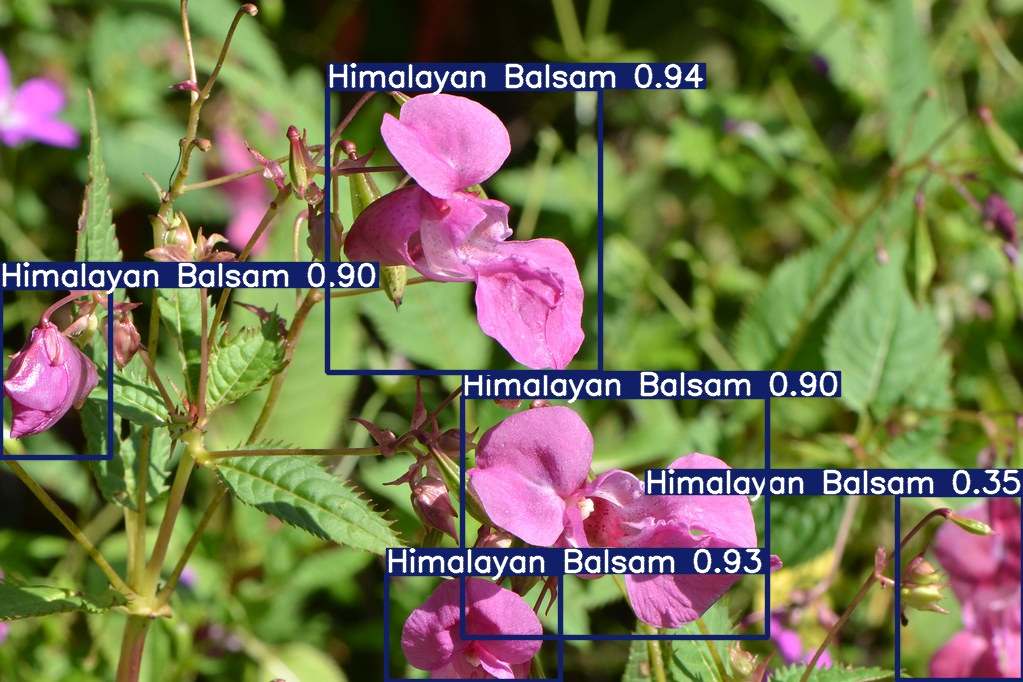

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict4/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
# Run inference on an image with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='himalayan leaf.jpg'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/himalayan leaf.jpg: 480x608 7 Himalayan Balsams, 222.5ms
Speed: 2.7ms preprocess, 222.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 608)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


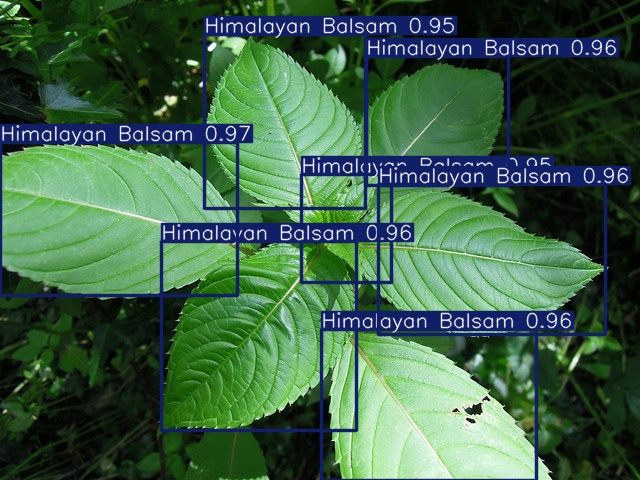

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict5/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
# Run inference on an image with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='japanese knotweed.jpg'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/japanese knotweed.jpg: 416x608 43 Japanese Knotweeds, 152.0ms
Speed: 4.9ms preprocess, 152.0ms inference, 532.0ms postprocess per image at shape (1, 3, 416, 608)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


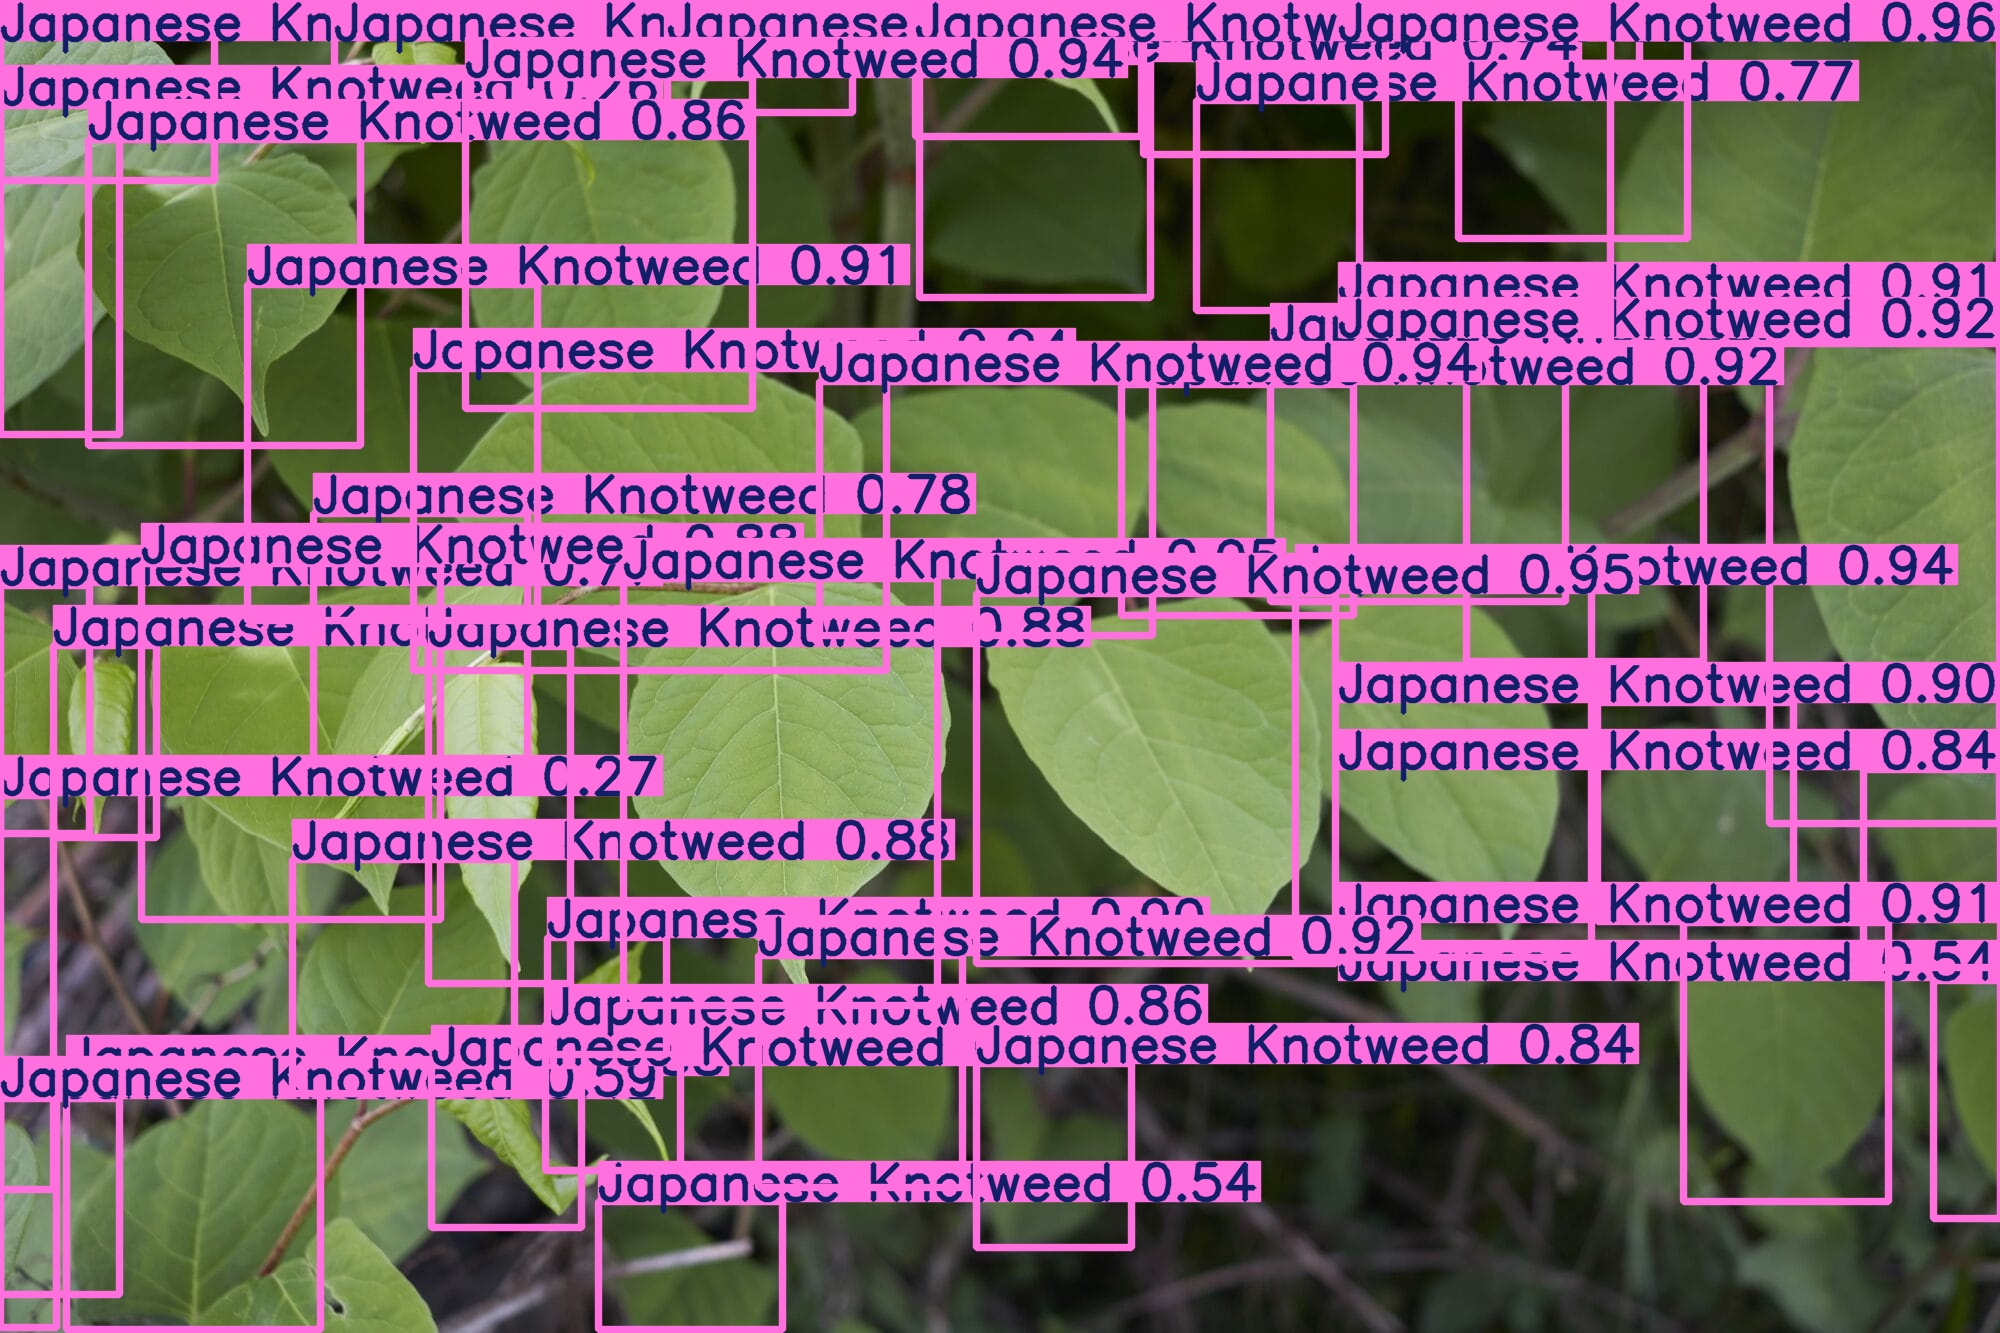

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
# Run inference on an image with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='giant hogweed.jpg'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/giant hogweed.jpg: 416x608 7 Giant Hogweeds, 224.1ms
Speed: 2.5ms preprocess, 224.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 608)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


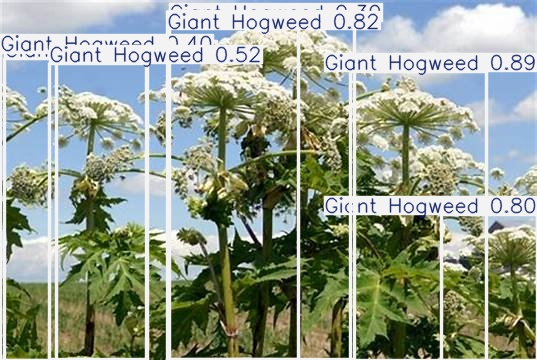

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict7/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
# Run inference on an image with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='bindweed.jpg'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/bindweed.jpg: 480x608 46 Bindweeds, 243.6ms
Speed: 2.3ms preprocess, 243.6ms inference, 4.5ms postprocess per image at shape (1, 3, 480, 608)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


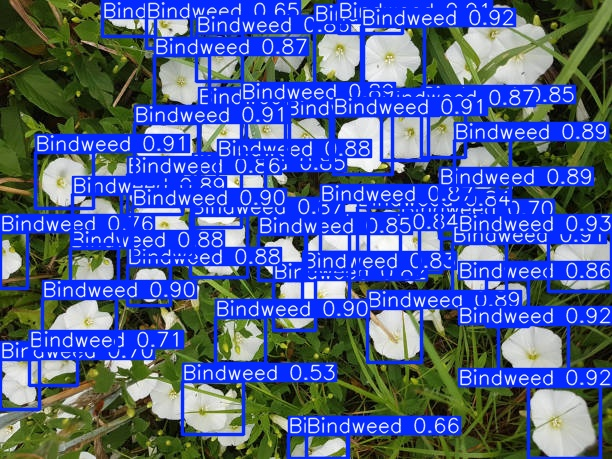

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict3/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
# Run inference on an image with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='bindweed leaf.jpg'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/bindweed leaf.jpg: 480x608 7 Bindweeds, 229.9ms
Speed: 4.4ms preprocess, 229.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 608)
Results saved to runs/detect/predict11
💡 Learn more at https://docs.ultralytics.com/modes/predict


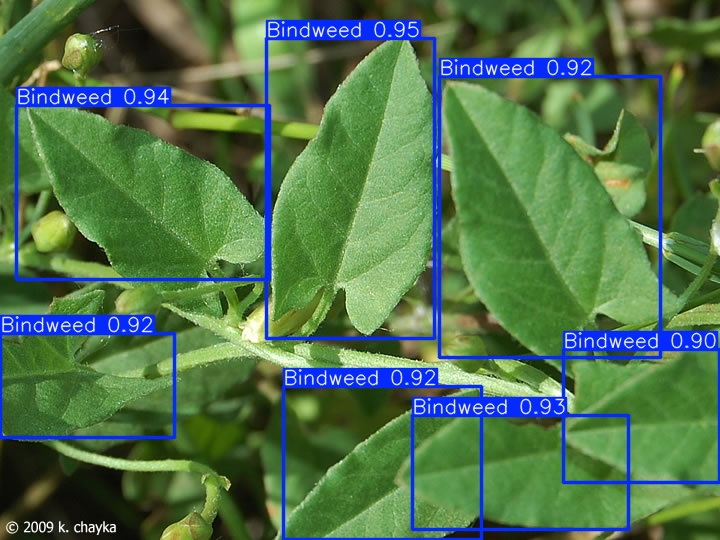

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict11/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
# Run inference on an image with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='ground elder.jpg'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/ground elder.jpg: 448x608 50 Ground Elders, 251.2ms
Speed: 2.5ms preprocess, 251.2ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 608)
Results saved to runs/detect/predict9
💡 Learn more at https://docs.ultralytics.com/modes/predict


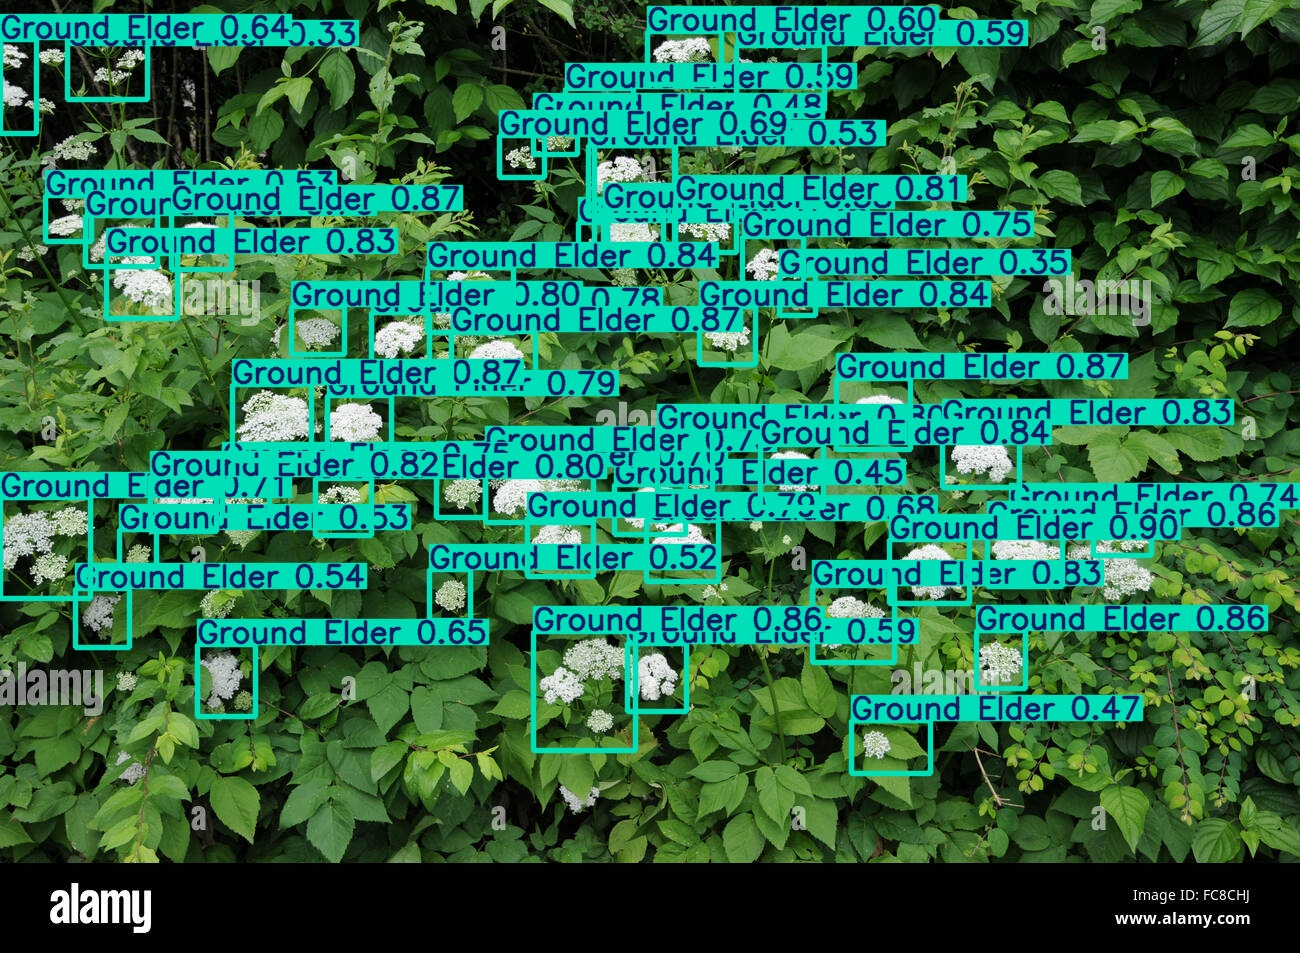

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict9/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
# Run inference on an image with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='elder leaf.jpg'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/elder leaf.jpg: 480x608 4 Ground Elders, 241.0ms
Speed: 3.7ms preprocess, 241.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 608)
Results saved to runs/detect/predict10
💡 Learn more at https://docs.ultralytics.com/modes/predict


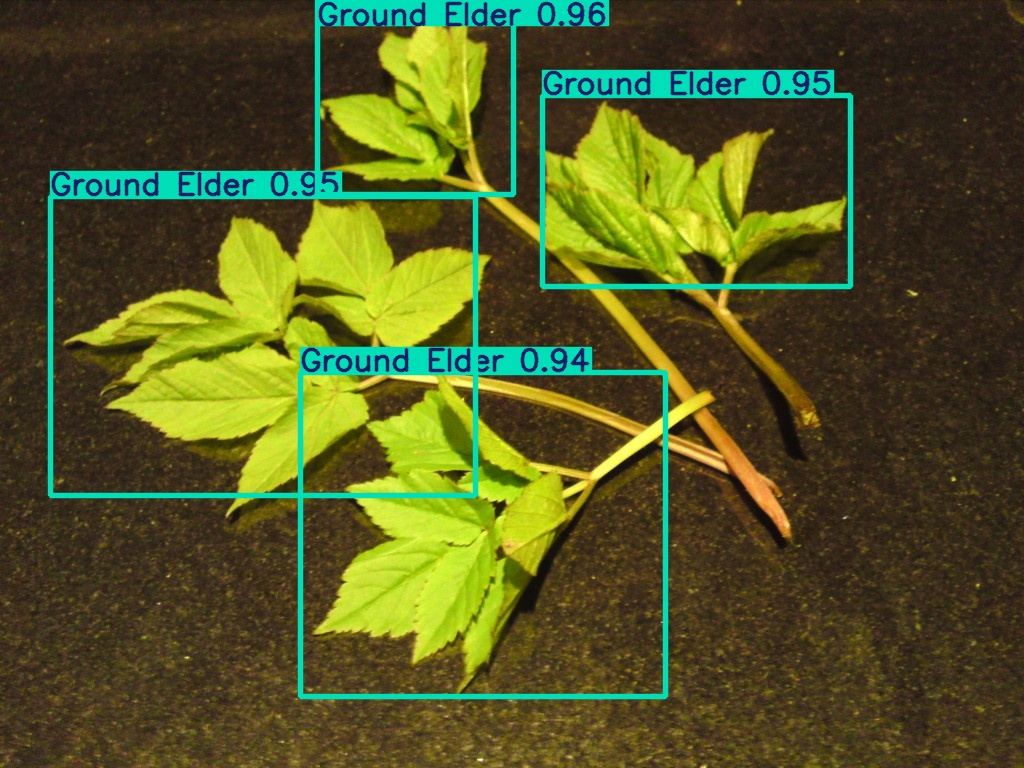

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict10/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
# Run inference on an image with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='giant leaf.jpg'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/giant leaf.jpg: 416x608 16 Giant Hogweeds, 205.5ms
Speed: 2.3ms preprocess, 205.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 608)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


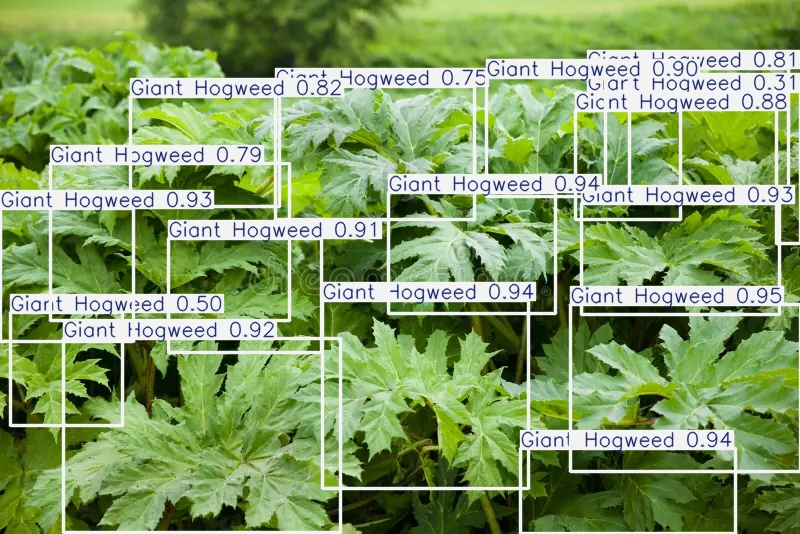

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict8/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
# Run inference on an video with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='black grass.mp4'

Streaming output truncated to the last 5000 lines.
video 1/1 (frame 3899/8895) /content/black grass.mp4: 352x608 2 Giant Hogweeds, 163.4ms
video 1/1 (frame 3900/8895) /content/black grass.mp4: 352x608 3 Giant Hogweeds, 160.8ms
video 1/1 (frame 3901/8895) /content/black grass.mp4: 352x608 3 Giant Hogweeds, 163.5ms
video 1/1 (frame 3902/8895) /content/black grass.mp4: 352x608 2 Giant Hogweeds, 151.7ms
video 1/1 (frame 3903/8895) /content/black grass.mp4: 352x608 3 Giant Hogweeds, 154.4ms
video 1/1 (frame 3904/8895) /content/black grass.mp4: 352x608 2 Giant Hogweeds, 148.3ms
video 1/1 (frame 3905/8895) /content/black grass.mp4: 352x608 2 Giant Hogweeds, 152.9ms
video 1/1 (frame 3906/8895) /content/black grass.mp4: 352x608 3 Giant Hogweeds, 155.5ms
video 1/1 (frame 3907/8895) /content/black grass.mp4: 352x608 3 Giant Hogweeds, 157.0ms
video 1/1 (frame 3908/8895) /content/black grass.mp4: 352x608 3 Giant Hogweeds, 150.7ms
video 1/1 (frame 3909/8895) /content/black grass.mp4: 352x608 3 Giant

In [ ]:
# Run inference on an video with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='himalayan.mp4'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/420) /content/himalayan.mp4: 352x608 7 Himalayan Balsams, 196.8ms
video 1/1 (frame 2/420) /content/himalayan.mp4: 352x608 7 Himalayan Balsams, 155.5ms
video 1/1 (frame 3/420) /content/himalayan.mp4: 352x608 3 Himalayan Balsams, 161.8ms
video 1/1 (frame 4/420) /content/himalayan.mp4: 352x608 4 Himalayan Balsams, 155.3ms
video 1/1 (frame 5/420) /content/himalayan.mp4: 352x608 3 Himalayan Balsams, 159.4ms
video 1/1 (frame 6/420) /content/himalayan.mp4: 352x608 1 Himalayan Balsam, 159.8ms
video 1/1 (frame 7/420) /content/himalayan.mp4: 352x608 1 Himalayan Balsam, 161.1ms
video 1/1 (frame 8/420) /content/himalayan.mp4: 352x608 3 Himalayan Balsams, 159.9ms
video 1/1 (frame 9/420) /content/himalayan.mp4: 352x608 1 Himalayan Balsam, 158.2ms
video 1/1 (frame 10/420) /content/himalayan.mp4: 352x608 3 Himalayan B

In [ ]:
# Run inference on an video with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='japanese.mp4'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/333) /content/japanese.mp4: 352x608 6 Japanese Knotweeds, 194.6ms
video 1/1 (frame 2/333) /content/japanese.mp4: 352x608 6 Japanese Knotweeds, 164.0ms
video 1/1 (frame 3/333) /content/japanese.mp4: 352x608 6 Japanese Knotweeds, 162.6ms
video 1/1 (frame 4/333) /content/japanese.mp4: 352x608 8 Japanese Knotweeds, 163.3ms
video 1/1 (frame 5/333) /content/japanese.mp4: 352x608 7 Japanese Knotweeds, 162.0ms
video 1/1 (frame 6/333) /content/japanese.mp4: 352x608 6 Japanese Knotweeds, 164.3ms
video 1/1 (frame 7/333) /content/japanese.mp4: 352x608 6 Japanese Knotweeds, 164.6ms
video 1/1 (frame 8/333) /content/japanese.mp4: 352x608 6 Japanese Knotweeds, 162.2ms
video 1/1 (frame 9/333) /content/japanese.mp4: 352x608 6 Japanese Knotweeds, 162.1ms
video 1/1 (frame 10/333) /content/japanese.mp4: 352x608 6 Japanese 

In [ ]:
# Run inference on an video with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='ground.mp4'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/222) /content/ground.mp4: 352x608 1 Giant Hogweed, 4 Ground Elders, 202.1ms
video 1/1 (frame 2/222) /content/ground.mp4: 352x608 1 Giant Hogweed, 4 Ground Elders, 160.7ms
video 1/1 (frame 3/222) /content/ground.mp4: 352x608 5 Ground Elders, 161.3ms
video 1/1 (frame 4/222) /content/ground.mp4: 352x608 4 Ground Elders, 159.2ms
video 1/1 (frame 5/222) /content/ground.mp4: 352x608 1 Giant Hogweed, 4 Ground Elders, 159.3ms
video 1/1 (frame 6/222) /content/ground.mp4: 352x608 1 Giant Hogweed, 4 Ground Elders, 161.7ms
video 1/1 (frame 7/222) /content/ground.mp4: 352x608 1 Giant Hogweed, 4 Ground Elders, 161.1ms
video 1/1 (frame 8/222) /content/ground.mp4: 352x608 1 Giant Hogweed, 4 Ground Elders, 159.7ms
video 1/1 (frame 9/222) /content/ground.mp4: 352x608 1 Giant Hogweed, 4 Ground Elders, 159.0ms
video 1/1 (

In [ ]:
# Run inference on an video with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='bindweed.mp4'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/194) /content/bindweed.mp4: 352x608 10 Bindweeds, 191.5ms
video 1/1 (frame 2/194) /content/bindweed.mp4: 352x608 10 Bindweeds, 154.0ms
video 1/1 (frame 3/194) /content/bindweed.mp4: 352x608 10 Bindweeds, 155.0ms
video 1/1 (frame 4/194) /content/bindweed.mp4: 352x608 10 Bindweeds, 156.4ms
video 1/1 (frame 5/194) /content/bindweed.mp4: 352x608 11 Bindweeds, 151.6ms
video 1/1 (frame 6/194) /content/bindweed.mp4: 352x608 10 Bindweeds, 148.9ms
video 1/1 (frame 7/194) /content/bindweed.mp4: 352x608 10 Bindweeds, 158.4ms
video 1/1 (frame 8/194) /content/bindweed.mp4: 352x608 10 Bindweeds, 159.5ms
video 1/1 (frame 9/194) /content/bindweed.mp4: 352x608 9 Bindweeds, 159.7ms
video 1/1 (frame 10/194) /content/bindweed.mp4: 352x608 9 Bindweeds, 151.4ms
video 1/1 (frame 11/194) /content/bindweed.mp4: 352x608 10 Bind

In [ ]:
# Run inference on an video with YOLOv8m
!yolo predict model='runs/detect/train/weights/best.pt' source='giant.mp4'

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,843,234 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/493) /content/giant.mp4: 352x608 4 Giant Hogweeds, 199.6ms
video 1/1 (frame 2/493) /content/giant.mp4: 352x608 4 Giant Hogweeds, 152.5ms
video 1/1 (frame 3/493) /content/giant.mp4: 352x608 4 Giant Hogweeds, 151.0ms
video 1/1 (frame 4/493) /content/giant.mp4: 352x608 3 Giant Hogweeds, 151.4ms
video 1/1 (frame 5/493) /content/giant.mp4: 352x608 3 Giant Hogweeds, 150.9ms
video 1/1 (frame 6/493) /content/giant.mp4: 352x608 3 Giant Hogweeds, 151.0ms
video 1/1 (frame 7/493) /content/giant.mp4: 352x608 3 Giant Hogweeds, 145.2ms
video 1/1 (frame 8/493) /content/giant.mp4: 352x608 3 Giant Hogweeds, 147.8ms
video 1/1 (frame 9/493) /content/giant.mp4: 352x608 3 Giant Hogweeds, 145.2ms
video 1/1 (frame 10/493) /content/giant.mp4: 352x608 3 Giant Hogweeds, 147.1ms
video 1/1 (frame 11/493) /content/giant.mp4: 352x60

In [ ]:
from ultralytics import YOLO

model_name = 'yolov8m' #@param ["yolov8n", "yolov8s", "yolov8m", "yolov8l", "yolov8x"]
input_width = 640 #@param {type:"slider", min:32, max:4096, step:32}
input_height = 640 #@param {type:"slider", min:32, max:4096, step:32}
optimize_cpu = True

model = YOLO(f"{model_name}.pt")
model.export(format="onnx", imgsz=[input_height,input_width], optimize=optimize_cpu)

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m summary (fused): 218 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

PyTorch: starting from 'yolov8m.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (49.7 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 1.9s, saved as 'yolov8m.onnx' (99.0 MB)

Export complete (4.2s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8m.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8m.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


'yolov8m.onnx'